---

# <center> ★ AI / ML Project - Online Grocery Recommendation System ★
#### <center> ***Domain: Reatail & E-Commerce***

---

<center> <img src="https://raw.githubusercontent.com/Masterx-AI/Project_InstaCart_Market_Basket_Analysis/main/ogr.jpg" style="width: 500px;"/>

---

### Description:

Whether you shop from meticulously planned grocery lists or let whimsy guide your grazing, our unique food rituals define who we are. Instacart, a grocery ordering and delivery app, aims to make it easy to fill your refrigerator and pantry with your personal favorites and staples when you need them. After selecting products through the Instacart app, personal shoppers review your order and do the in-store shopping and delivery for you.

Instacart’s data science team plays a big part in providing this delightful shopping experience. Currently they use transactional data to develop models that predict which products a user will buy again, try for the first time, or add to their cart next during a session. Recently, Instacart open sourced this data - see their blog post on 3 Million Instacart Orders, Open Sourced.

In this competition, Instacart is challenging the Kaggle community to use this anonymized data on customer orders over time to predict which previously purchased products will be in a user’s next order. They’re not only looking for the best model, Instacart’s also looking for machine learning engineers to grow their team.


### Acknowledgements:
This dataset is taken from Kaggle, \
https://www.kaggle.com/c/instacart-market-basket-analysis/data

### Objective:
- Understand the Dataset & cleanup (if required).
- Build classification model to recommend groceries based on users past purchases.

---

## <center> Stractegic Plan of Action:

**We aim to solve the problem statement by creating a plan of action, Here are some of the necessary steps:**
1. Data Exploration
2. Data Pre-processing
3. Exploratory Data Analysis (EDA)
4. Data Manipulation
5. Predictive Modelling
6. Project Outcomes & Conclusion

---

## <center>1. Data Exploration

In [108]:
#Importing the basic librarires

import os
import math
import scipy
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import tree
from scipy.stats import randint
from scipy.stats import loguniform
from IPython.display import display

from scipy.sparse import csr_matrix
# from imblearn.over_sampling import SMOTE
from sklearn.feature_selection import RFE
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold

from sklearn.neighbors import NearestNeighbors

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, \
f1_score, roc_auc_score, roc_curve, precision_score, recall_score

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10,6]

import warnings 
warnings.filterwarnings('ignore')

In [109]:
#Importing the dataset

df1 = pd.read_csv('products.csv')
#display(df1.head())
print(df1.shape)
df2 = pd.read_csv('aisles.csv')
#display(df2.head())
print(df2.shape)
df3 = pd.read_csv('departments.csv')
#display(df3.head())
print(df3.shape)
df4 = pd.read_csv('order_products__train.csv')
#display(df4.head())
print(df4.shape)
df5 = pd.read_csv('orders.csv')
#display(df5.head())
print(df5.shape)

df12 = pd.merge(df2, df1, how='inner', on='aisle_id')
df123 = pd.merge(df12, df3, how='inner', on='department_id')
df1234 = pd.merge(df4, df123, how='inner', on='product_id')
df12345 = pd.merge(df5, df1234, how='inner', on='order_id')

df = df12345.drop(['aisle_id','department_id','eval_set','order_number'],axis=1)
display(df.head())
print('\n\033[1mInference:\033[0m The Datset consists of {} features & {} samples.'.format(df.shape[1], df.shape[0]))

(49688, 4)
(134, 2)
(21, 2)
(1384617, 4)
(3421083, 7)


,order_id,user_id,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,aisle,product_name,department
0,1187899,1,4,8,14.0,49235,10,1,cream,Organic Half & Half,dairy eggs
1,1187899,1,4,8,14.0,46149,11,1,soft drinks,Zero Calorie Cola,beverages
2,1187899,1,4,8,14.0,196,1,1,soft drinks,Soda,beverages
3,1187899,1,4,8,14.0,27845,9,0,milk,Organic Whole Milk,dairy eggs
4,1187899,1,4,8,14.0,38928,3,1,yogurt,0% Greek Strained Yogurt,dairy eggs



Inference: The Datset consists of 11 features & 1384617 samples.


In [110]:
#Checking the dtypes of all the columns
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1384617 entries, 0 to 1384616
Data columns (total 11 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   order_id                1384617 non-null  int64  
 1   user_id                 1384617 non-null  int64  
 2   order_dow               1384617 non-null  int64  
 3   order_hour_of_day       1384617 non-null  int64  
 4   days_since_prior_order  1384617 non-null  float64
 5   product_id              1384617 non-null  int64  
 6   add_to_cart_order       1384617 non-null  int64  
 7   reordered               1384617 non-null  int64  
 8   aisle                   1384617 non-null  object 
 9   product_name            1384617 non-null  object 
 10  department              1384617 non-null  object 
dtypes: float64(1), int64(7), object(3)
memory usage: 126.8+ MB
None


In [111]:
#Checking number of unique rows in each feature
print(df.nunique().sort_values())

reordered                      2
order_dow                      7
department                    21
order_hour_of_day             24
days_since_prior_order        31
add_to_cart_order             80
aisle                        134
product_id                 39123
product_name               39123
order_id                  131209
user_id                   131209
dtype: int64


In [112]:
#Checking the stats of all the columns
display(df.describe())

,order_id,user_id,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered
count,1.384617e+06,1.384617e+06,1.384617e+06,1.384617e+06,1.384617e+06,1.384617e+06,1.384617e+06,1.384617e+06
mean,1.706298e+06,1.031128e+05,2.701392e+00,1.357759e+01,1.706613e+01,2.555624e+04,8.758044e+00,5.985944e-01
std,9.897326e+05,5.948715e+04,2.167646e+00,4.238458e+00,1.042642e+01,1.412127e+04,7.423936e+00,4.901829e-01
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00
25%,8.433700e+05,5.173200e+04,1.000000e+00,1.000000e+01,7.000000e+00,1.338000e+04,3.000000e+00,0.000000e+00
50%,1.701880e+06,1.029330e+05,3.000000e+00,1.400000e+01,1.500000e+01,2.529800e+04,7.000000e+00,1.000000e+00
75%,2.568023e+06,1.549590e+05,5.000000e+00,1.700000e+01,3.000000e+01,3.794000e+04,1.200000e+01,1.000000e+00
max,3.421070e+06,2.062090e+05,6.000000e+00,2.300000e+01,3.000000e+01,4.968800e+04,8.000000e+01,1.000000e+00


**Inference:** The stats seem to be fine, let us gain more undestanding by visualising the dataset.

---

## <center> 2. Exploratory Data Analysis (EDA)

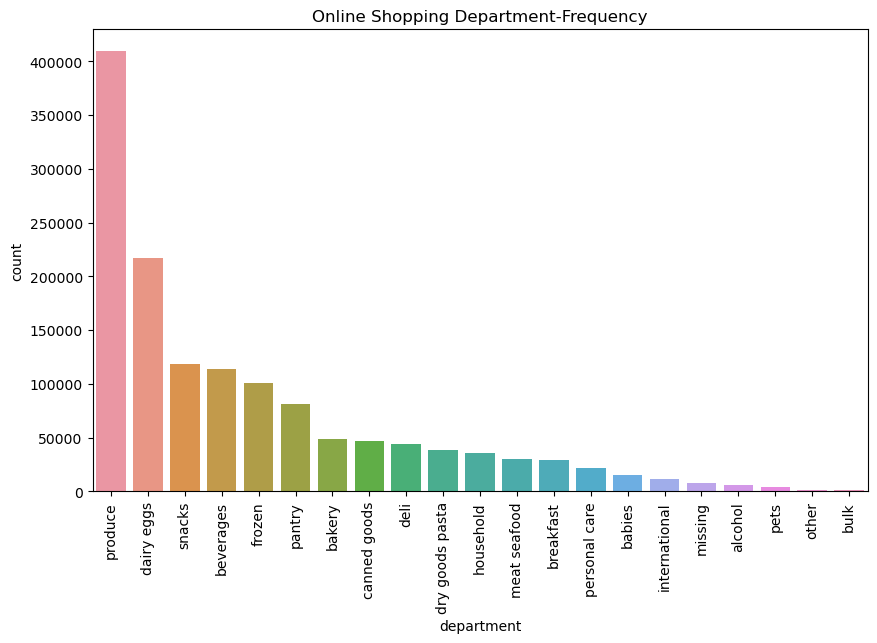

In [113]:
#Let us first analyze the department distribution
sns.countplot(df.department, order=df.department.value_counts().index)
plt.title('Online Shopping Department-Frequency')
plt.xticks(rotation=90)
plt.show()

**Inference:** The median of the majority votes seem to be at 3.5, while small number of votes are offered for 0.5 & 1...

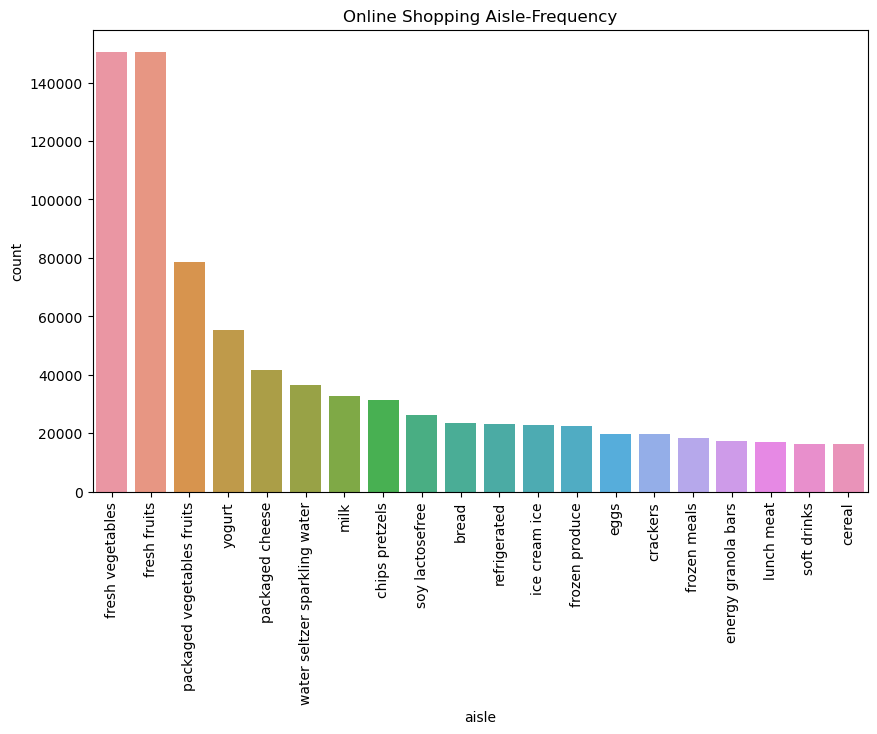

In [114]:
#Let us now analyze the aisle distribution
sns.countplot(df.aisle, order=df.aisle.value_counts().index[:20])
plt.title('Online Shopping Aisle-Frequency')
plt.xticks(rotation=90)
plt.show()

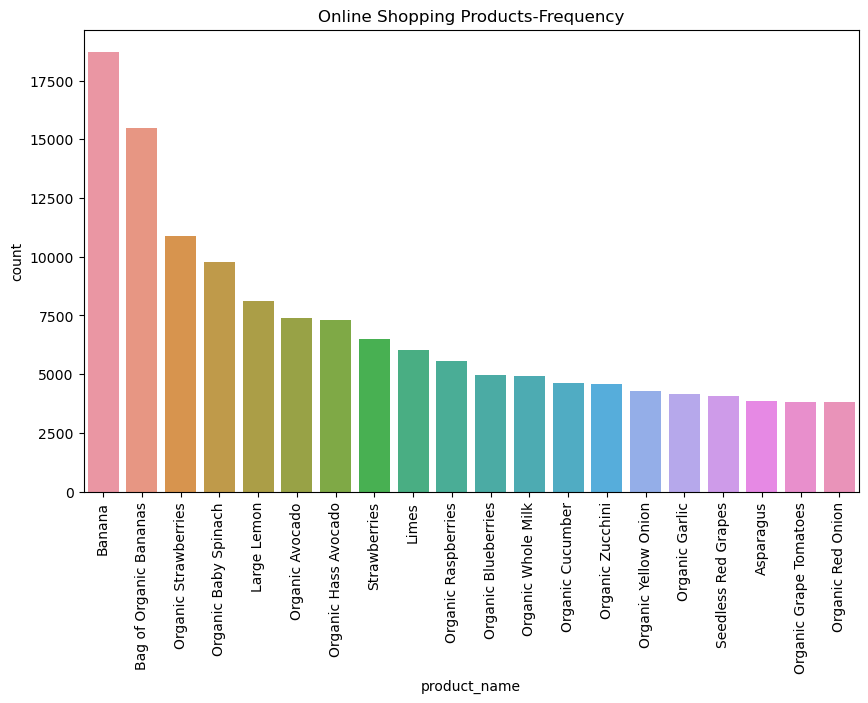

In [115]:
#Let us now analyze the products distribution

sns.countplot(df.product_name, order=df.product_name.value_counts().index[:20])
plt.title('Online Shopping Products-Frequency')
plt.xticks(rotation=90)
plt.show()

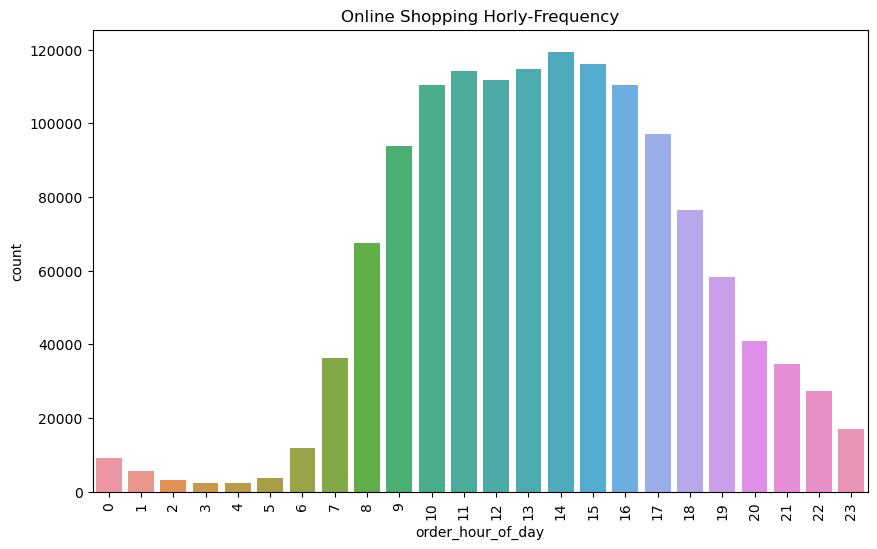

In [116]:
#Let us now analyze the hourly distribution

sns.countplot(df.order_hour_of_day)#, order=df.aisle.value_counts().index[:20])
plt.title('Online Shopping Horly-Frequency')
plt.xticks(rotation=90)
plt.show()

---

## <center> 3. Data Preprocessing

In [117]:
#Check for empty elements

print(df.isnull().sum())
print('\n\033[1mInference:\033[0m The dataset doesn\'t have any null elements')

order_id                  0
user_id                   0
order_dow                 0
order_hour_of_day         0
days_since_prior_order    0
product_id                0
add_to_cart_order         0
reordered                 0
aisle                     0
product_name              0
department                0
dtype: int64

Inference: The dataset doesn't have any null elements


In [118]:
# Removal of any Duplicate rows (if any)
    
counter = 0
r,c = df.shape

df1 = df.drop_duplicates()
df1.reset_index(drop=True,inplace=True)

if df1.shape==(r,c):
    print('\n\033[1mInference:\033[0m The dataset doesn\'t have any duplicates')
else:
    print(f'\n\033[1mInference:\033[0m Number of duplicates dropped ---> {r-df.shape[0]}')
    


Inference: The dataset doesn't have any duplicates


In [119]:
dummies_df = pd.get_dummies(data=df, prefix=['Day','Hour'], columns=['order_dow','order_hour_of_day'], drop_first=True)
dummies_df.head()

,order_id,user_id,days_since_prior_order,product_id,add_to_cart_order,reordered,aisle,product_name,department,Day_1,...,Hour_14,Hour_15,Hour_16,Hour_17,Hour_18,Hour_19,Hour_20,Hour_21,Hour_22,Hour_23
0,1187899,1,14.0,49235,10,1,cream,Organic Half & Half,dairy eggs,0,...,0,0,0,0,0,0,0,0,0,0
1,1187899,1,14.0,46149,11,1,soft drinks,Zero Calorie Cola,beverages,0,...,0,0,0,0,0,0,0,0,0,0
2,1187899,1,14.0,196,1,1,soft drinks,Soda,beverages,0,...,0,0,0,0,0,0,0,0,0,0
3,1187899,1,14.0,27845,9,0,milk,Organic Whole Milk,dairy eggs,0,...,0,0,0,0,0,0,0,0,0,0
4,1187899,1,14.0,38928,3,1,yogurt,0% Greek Strained Yogurt,dairy eggs,0,...,0,0,0,0,0,0,0,0,0,0


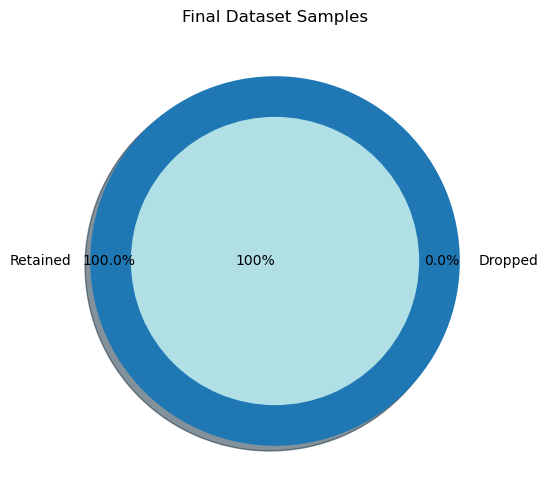


Inference:The final dataset after cleanup has 1384617 samples & 11 rows.


In [120]:
#Final Dataset size after performing Preprocessing

plt.title('Final Dataset Samples')
plt.pie([df1.shape[0], df1.shape[0]-df.shape[0]], radius = 1, shadow=True,
        labels=['Retained','Dropped'], counterclock=False, autopct='%1.1f%%', pctdistance=0.9, explode=[0,0])
plt.pie([df.shape[0]], labels=['100%'], labeldistance=-0, radius=0.78, shadow=True, colors=['powderblue'])
plt.show()

print('\n\033[1mInference:\033[0mThe final dataset after cleanup has {} samples & {} rows.'.format(df.shape[0], df.shape[1]))

---

## <center> 4. Data Manipulation

In [121]:
user_prod_df = dummies_df.groupby(['user_id','product_id']).agg({'order_id':'nunique',
                                                                 'days_since_prior_order':'mean',
                                                                 'reordered':'max',
                                                                 'Day_1':'sum',
                                                                 'Day_2':'sum',
                                                                 'Day_3':'sum',
                                                                 'Day_4':'sum',
                                                                 'Day_5':'sum',
                                                                 'Day_6':'sum',
                                                                 'Hour_1':'sum',
                                                                 'Hour_2':'sum',
                                                                 'Hour_3':'sum',
                                                                 'Hour_4':'sum',
                                                                 'Hour_5':'sum',
                                                                 'Hour_6':'sum',
                                                                 'Hour_7':'sum',
                                                                 'Hour_8':'sum',
                                                                 'Hour_9':'sum',
                                                                 'Hour_10':'sum',
                                                                 'Hour_11':'sum',
                                                                 'Hour_12':'sum',
                                                                 'Hour_13':'sum',
                                                                 'Hour_14':'sum',
                                                                 'Hour_15':'sum',
                                                                 'Hour_16':'sum',
                                                                 'Hour_17':'sum',
                                                                 'Hour_18':'sum',
                                                                 'Hour_19':'sum',
                                                                 'Hour_20':'sum',
                                                                 'Hour_21':'sum',
                                                                 'Hour_22':'sum',
                                                                 'Hour_23':'sum'
                                                                }).reset_index()
user_prod_df.head()

,user_id,product_id,order_id,days_since_prior_order,reordered,Day_1,Day_2,Day_3,Day_4,Day_5,...,Hour_14,Hour_15,Hour_16,Hour_17,Hour_18,Hour_19,Hour_20,Hour_21,Hour_22,Hour_23
0,1,196,1,14.0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,1,10258,1,14.0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,1,13032,1,14.0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,1,25133,1,14.0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,1,26088,1,14.0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [122]:
user_purchase_df = dummies_df.groupby(['user_id']).agg({         'order_id':'nunique',
                                                                 'product_id': 'nunique',
                                                                 'days_since_prior_order':'mean',
                                                                 'reordered':'sum',
                                                                 'Day_1':'sum',
                                                                 'Day_2':'sum',
                                                                 'Day_3':'sum',
                                                                 'Day_4':'sum',
                                                                 'Day_5':'sum',
                                                                 'Day_6':'sum',
                                                                 'Hour_1':'sum',
                                                                 'Hour_2':'sum',
                                                                 'Hour_3':'sum',
                                                                 'Hour_4':'sum',
                                                                 'Hour_5':'sum',
                                                                 'Hour_6':'sum',
                                                                 'Hour_7':'sum',
                                                                 'Hour_8':'sum',
                                                                 'Hour_9':'sum',
                                                                 'Hour_10':'sum',
                                                                 'Hour_11':'sum',
                                                                 'Hour_12':'sum',
                                                                 'Hour_13':'sum',
                                                                 'Hour_14':'sum',
                                                                 'Hour_15':'sum',
                                                                 'Hour_16':'sum',
                                                                 'Hour_17':'sum',
                                                                 'Hour_18':'sum',
                                                                 'Hour_19':'sum',
                                                                 'Hour_20':'sum',
                                                                 'Hour_21':'sum',
                                                                 'Hour_22':'sum',
                                                                 'Hour_23':'sum'
                                                                }).reset_index()
user_purchase_df.head()

,user_id,order_id,product_id,days_since_prior_order,reordered,Day_1,Day_2,Day_3,Day_4,Day_5,...,Hour_14,Hour_15,Hour_16,Hour_17,Hour_18,Hour_19,Hour_20,Hour_21,Hour_22,Hour_23
0,1,1,11,14.0,10,0,0,0,11,0,...,0,0,0,0,0,0,0,0,0,0
1,2,1,31,30.0,12,31,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,5,1,9,6.0,4,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,7,1,9,6.0,8,0,9,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,8,1,18,10.0,4,18,0,0,0,0,...,18,0,0,0,0,0,0,0,0,0


In [123]:
product_purchase_df = dummies_df.groupby(['product_id']).agg({   'order_id':'nunique',
                                                                 'user_id': 'nunique',
                                                                 'days_since_prior_order':'mean',
                                                                 'reordered':'sum',
                                                                 'Day_1':'sum',
                                                                 'Day_2':'sum',
                                                                 'Day_3':'sum',
                                                                 'Day_4':'sum',
                                                                 'Day_5':'sum',
                                                                 'Day_6':'sum',
                                                                 'Hour_1':'sum',
                                                                 'Hour_2':'sum',
                                                                 'Hour_3':'sum',
                                                                 'Hour_4':'sum',
                                                                 'Hour_5':'sum',
                                                                 'Hour_6':'sum',
                                                                 'Hour_7':'sum',
                                                                 'Hour_8':'sum',
                                                                 'Hour_9':'sum',
                                                                 'Hour_10':'sum',
                                                                 'Hour_11':'sum',
                                                                 'Hour_12':'sum',
                                                                 'Hour_13':'sum',
                                                                 'Hour_14':'sum',
                                                                 'Hour_15':'sum',
                                                                 'Hour_16':'sum',
                                                                 'Hour_17':'sum',
                                                                 'Hour_18':'sum',
                                                                 'Hour_19':'sum',
                                                                 'Hour_20':'sum',
                                                                 'Hour_21':'sum',
                                                                 'Hour_22':'sum',
                                                                 'Hour_23':'sum'
                                                                }).reset_index()
product_purchase_df.head()

,product_id,order_id,user_id,days_since_prior_order,reordered,Day_1,Day_2,Day_3,Day_4,Day_5,...,Hour_14,Hour_15,Hour_16,Hour_17,Hour_18,Hour_19,Hour_20,Hour_21,Hour_22,Hour_23
0,1,76,76,17.118421,49,14.0,14.0,10.0,13.0,14.0,...,5.0,3.0,4.0,8.0,1.0,3.0,0.0,1.0,4.0,0
1,2,4,4,10.750000,1,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0
2,3,6,6,21.000000,6,0.0,0.0,2.0,0.0,2.0,...,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,4,22,22,17.272727,14,2.0,5.0,3.0,1.0,1.0,...,3.0,2.0,3.0,2.0,3.0,2.0,0.0,0.0,0.0,1
4,5,1,1,21.000000,1,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [124]:
temp = pd.merge(left=user_prod_df,  right=user_purchase_df, on='user_id', suffixes=('','_user'))
temp.head(10)

,user_id,product_id,order_id,days_since_prior_order,reordered,Day_1,Day_2,Day_3,Day_4,Day_5,...,Hour_14_user,Hour_15_user,Hour_16_user,Hour_17_user,Hour_18_user,Hour_19_user,Hour_20_user,Hour_21_user,Hour_22_user,Hour_23_user
0,1,196,1,14.0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,1,10258,1,14.0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,1,13032,1,14.0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,1,25133,1,14.0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,1,26088,1,14.0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
5,1,26405,1,14.0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
6,1,27845,1,14.0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
7,1,38928,1,14.0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
8,1,39657,1,14.0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
9,1,46149,1,14.0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [125]:
features_df = pd.merge(left=temp,  right=product_purchase_df, on='product_id', suffixes=('','_prod'))
features_df.head(10)

,user_id,product_id,order_id,days_since_prior_order,reordered,Day_1,Day_2,Day_3,Day_4,Day_5,...,Hour_14_prod,Hour_15_prod,Hour_16_prod,Hour_17_prod,Hour_18_prod,Hour_19_prod,Hour_20_prod,Hour_21_prod,Hour_22_prod,Hour_23_prod
0,1,196,1,14.0,1,0,0,0,1,0,...,135.0,124.0,78.0,79.0,56.0,42.0,25.0,34.0,22.0,16
1,67,196,1,5.0,1,0,0,0,0,0,...,135.0,124.0,78.0,79.0,56.0,42.0,25.0,34.0,22.0,16
2,676,196,1,26.0,1,0,0,0,0,0,...,135.0,124.0,78.0,79.0,56.0,42.0,25.0,34.0,22.0,16
3,760,196,1,8.0,1,0,0,0,1,0,...,135.0,124.0,78.0,79.0,56.0,42.0,25.0,34.0,22.0,16
4,804,196,1,5.0,0,0,0,1,0,0,...,135.0,124.0,78.0,79.0,56.0,42.0,25.0,34.0,22.0,16
5,865,196,1,30.0,0,0,0,0,0,1,...,135.0,124.0,78.0,79.0,56.0,42.0,25.0,34.0,22.0,16
6,992,196,1,30.0,1,0,0,0,0,1,...,135.0,124.0,78.0,79.0,56.0,42.0,25.0,34.0,22.0,16
7,1306,196,1,6.0,1,0,0,0,0,1,...,135.0,124.0,78.0,79.0,56.0,42.0,25.0,34.0,22.0,16
8,1512,196,1,27.0,0,1,0,0,0,0,...,135.0,124.0,78.0,79.0,56.0,42.0,25.0,34.0,22.0,16
9,1550,196,1,30.0,1,1,0,0,0,0,...,135.0,124.0,78.0,79.0,56.0,42.0,25.0,34.0,22.0,16


In [126]:
def my_reset(varnames):
    """
    varnames are what you want to keep
    """
    globals_ = globals()
    to_save = {v: globals_[v] for v in varnames}
    to_save['my_reset'] = my_reset  # lets keep this function by default
    del globals_
    get_ipython().magic("reset")
    globals().update(to_save)
    
variables = ['features_df']
my_reset(variables)

In [127]:
def reduce_mem_usage(df):
    """ iterate through all the columns of a dataframe and modify the data type
        to reduce memory usage.        
    """
    start_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage of dataframe is {:.2f} MB'.format(start_mem))
    
    for col in df.columns:
        col_type = df[col].dtype
        col_type2 = df[col].dtype.name
        
        if ((col_type != object) and (col_type2 != 'category')):
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)
        else:
            df[col] = df[col].astype('category')

    end_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage after optimization is: {:.2f} MB'.format(end_mem))
    print('Decreased by {:.1f}%'.format(100 * (start_mem - end_mem) / start_mem))
    
    return df

In [128]:
import numpy as np
reduce_features_df = reduce_mem_usage(features_df)

Memory usage of dataframe is 466.13 MB
Memory usage after optimization is: 273.34 MB
Decreased by 41.4%


In [129]:
reduce_features_df.isnull().sum().sort_values()

user_id                        0
Day_2_prod                     0
Day_1_prod                     0
reordered_prod                 0
days_since_prior_order_prod    0
                              ..
Hour_18                        0
Hour_17                        0
Hour_16                        0
days_since_prior_order_user    0
Hour_23_prod                   0
Length: 100, dtype: int64

In [130]:
reduced_feature= reduce_features_df[:1000]
reduced_feature

,user_id,product_id,order_id,days_since_prior_order,reordered,Day_1,Day_2,Day_3,Day_4,Day_5,...,Hour_14_prod,Hour_15_prod,Hour_16_prod,Hour_17_prod,Hour_18_prod,Hour_19_prod,Hour_20_prod,Hour_21_prod,Hour_22_prod,Hour_23_prod
0,1,196,1,14.0,1,0.0,0.0,0.0,1.0,0.0,...,135.0,124.0,78.0,79.0,56.0,42.0,25.0,34.0,22.0,16.0
1,67,196,1,5.0,1,0.0,0.0,0.0,0.0,0.0,...,135.0,124.0,78.0,79.0,56.0,42.0,25.0,34.0,22.0,16.0
2,676,196,1,26.0,1,0.0,0.0,0.0,0.0,0.0,...,135.0,124.0,78.0,79.0,56.0,42.0,25.0,34.0,22.0,16.0
3,760,196,1,8.0,1,0.0,0.0,0.0,1.0,0.0,...,135.0,124.0,78.0,79.0,56.0,42.0,25.0,34.0,22.0,16.0
4,804,196,1,5.0,0,0.0,0.0,1.0,0.0,0.0,...,135.0,124.0,78.0,79.0,56.0,42.0,25.0,34.0,22.0,16.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,136086,196,1,16.0,0,0.0,0.0,1.0,0.0,0.0,...,135.0,124.0,78.0,79.0,56.0,42.0,25.0,34.0,22.0,16.0
996,136300,196,1,7.0,1,0.0,0.0,0.0,0.0,0.0,...,135.0,124.0,78.0,79.0,56.0,42.0,25.0,34.0,22.0,16.0
997,136331,196,1,27.0,1,0.0,0.0,1.0,0.0,0.0,...,135.0,124.0,78.0,79.0,56.0,42.0,25.0,34.0,22.0,16.0
998,136414,196,1,2.0,1,0.0,0.0,0.0,1.0,0.0,...,135.0,124.0,78.0,79.0,56.0,42.0,25.0,34.0,22.0,16.0


In [154]:
reduced_feature.columns

Index(['user_id', 'product_id', 'order_id', 'days_since_prior_order',
       'reordered', 'Day_1', 'Day_2', 'Day_3', 'Day_4', 'Day_5', 'Day_6',
       'Hour_1', 'Hour_2', 'Hour_3', 'Hour_4', 'Hour_5', 'Hour_6', 'Hour_7',
       'Hour_8', 'Hour_9', 'Hour_10', 'Hour_11', 'Hour_12', 'Hour_13',
       'Hour_14', 'Hour_15', 'Hour_16', 'Hour_17', 'Hour_18', 'Hour_19',
       'Hour_20', 'Hour_21', 'Hour_22', 'Hour_23', 'order_id_user',
       'product_id_user', 'days_since_prior_order_user', 'reordered_user',
       'Day_1_user', 'Day_2_user', 'Day_3_user', 'Day_4_user', 'Day_5_user',
       'Day_6_user', 'Hour_1_user', 'Hour_2_user', 'Hour_3_user',
       'Hour_4_user', 'Hour_5_user', 'Hour_6_user', 'Hour_7_user',
       'Hour_8_user', 'Hour_9_user', 'Hour_10_user', 'Hour_11_user',
       'Hour_12_user', 'Hour_13_user', 'Hour_14_user', 'Hour_15_user',
       'Hour_16_user', 'Hour_17_user', 'Hour_18_user', 'Hour_19_user',
       'Hour_20_user', 'Hour_21_user', 'Hour_22_user', 'Hour_23_user',


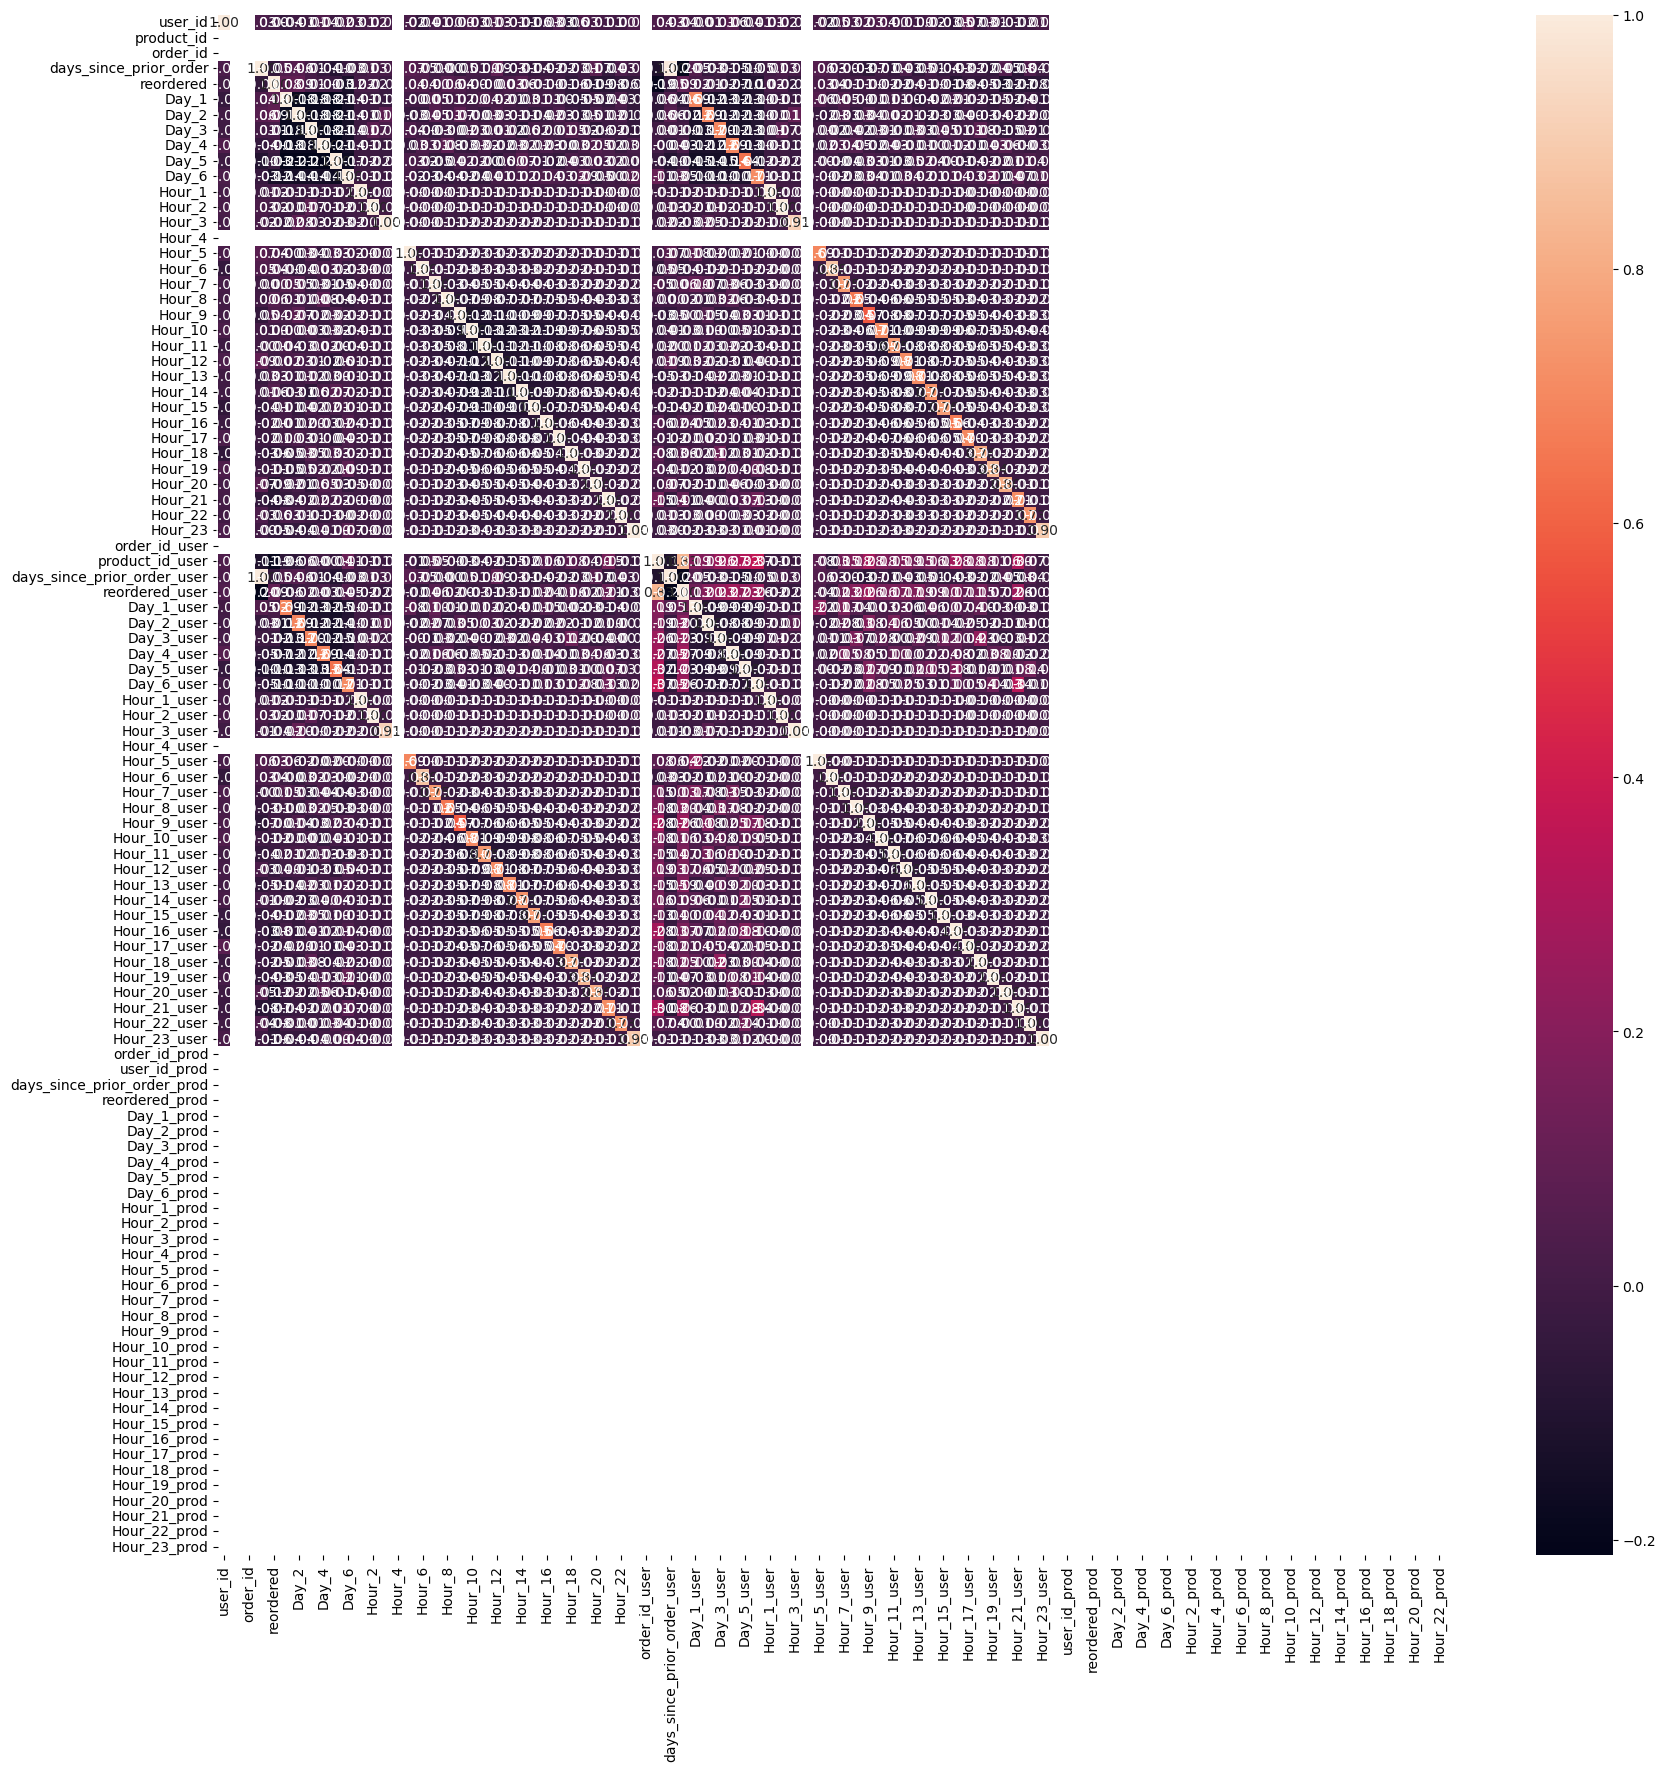

In [152]:
# matriz de correlación de reduced_feature
import seaborn as sns

corr_matrix = reduced_feature.corr()
plt.figure(figsize=(20, 20))
sns.heatmap(corr_matrix, annot=True, fmt=".2f")
plt.show()


In [136]:
#Splitting Training & Testing Data
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X = scaler.fit_transform(reduced_feature)
X_train, X_test = train_test_split(X, test_size=0.2, random_state=42)

---

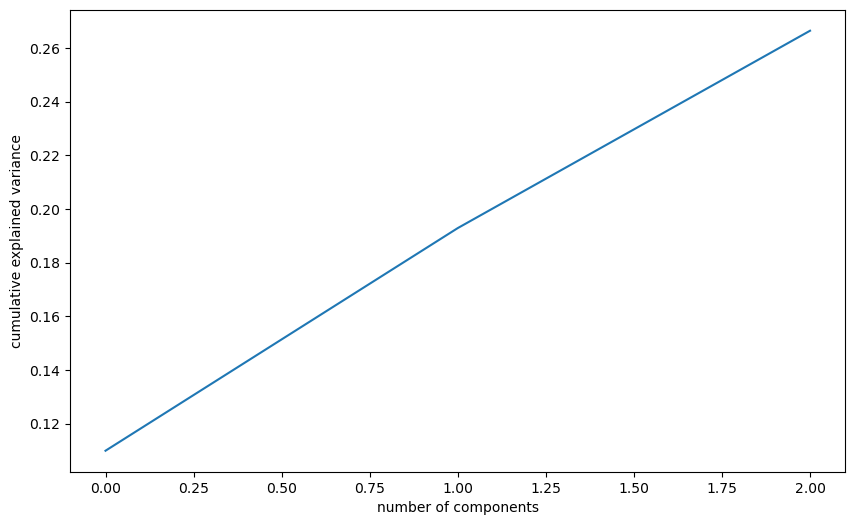

In [137]:
# PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

# analisis de PCA components
explained_variance = pca.explained_variance_ratio_
explained_variance

# analisis de vectores propios
eigenvalues = pca.components_
eigenvalues

# analisis de valores propios
eigenvalues = pca.explained_variance_
eigenvalues

import matplotlib.pyplot as plt

# gráfico de varianza explicada
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

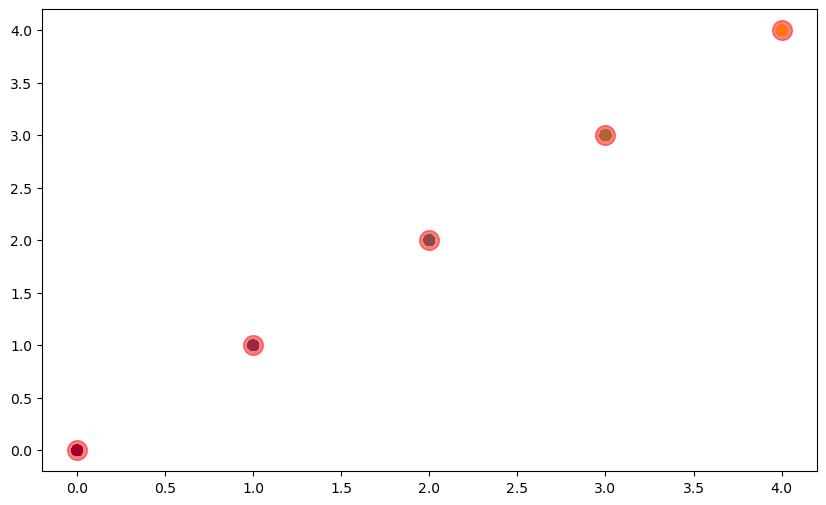

In [147]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5)
X_train = kmeans.fit_predict(X_train.reshape(-1,1))
X_test = kmeans.predict(X_test.reshape(-1,1))

# analisis de clusters
kmeans.cluster_centers_

# analisis de inercia
kmeans.inertia_

# analisis de etiquetas
kmeans.labels_

# gráfico de clusters
plt.scatter(X_train, X_train, c=kmeans.labels_, s=50, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers, centers, c='red', s=200, alpha=0.5)
plt.show()


## K-Nearest Neighbours Classfier:

In [82]:
# Building Neareset Neighbours Classifier with Cosine distance measure

from sklearn.neighbors import NearestNeighbors

model_knn = NearestNeighbors(metric = 'cosine', algorithm = 'brute')
model_knn.fit(X_train)

NearestNeighbors(algorithm='brute', metric='cosine')

In [83]:
import numpy as np
query_index = np.random.choice(X_train.shape[0])
distances, indices = model_knn.kneighbors(X_train.iloc[query_index, :].values.reshape((1, -1)), n_neighbors = 6)

j=1
for i in range(0, len(distances.flatten())):
    if i == 0:
        print('Recommendations for {0}:\n'.format(X_train.index[indices.flatten()[i]]))
    else:
        try:
            print('{0}: {1}'.format(j, df1[df1['product_id']==X_train.index[indices.flatten()[i]]].product_name.values[0]))
            j+=1
        except:
            pass

Recommendations for 909:



---

## <center> 6. Project Outcomes & Conclusions

### Here are some of the key outcomes of the project:
- The Dataset was quiet large with combined data totally around 1.3M. 
- There were also few outliers & no duplicates present in the datset, which had to be dropped.
- Visualising the distribution of data & their relationships, helped us to get some insights on the relationship between the featureset.
- Further filtering was done with threshold for the number of user id's & product id's.
- Finally Nearest Neighbours Algorithm was employed to get the similar Groceries Recommendations based on the Cosine Similarity.

In [ ]:
#<<<--------------------------------------------THE END-------------------------------------------->>>